In [6]:
%pip install numpy pandas scikit-learn matplotlib seaborn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/168.3 kB ? eta -:--:--
     ------------------------------------ - 163.8/168.3 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 168.3/168.3 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.0 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 4.8 MB/s eta 0:00:03
   


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [8]:
iris = load_iris()
X = iris.data
y = iris.target 

### Split dataset menjadi training dan testing set

In [9]:
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = y

### Melatih model SVM

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melatih model SVM

In [11]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [12]:
y_pred = svm.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Labels: 0 = setosa, 1 = versicolor, 2 = virginica

<Figure size 1000x600 with 0 Axes>

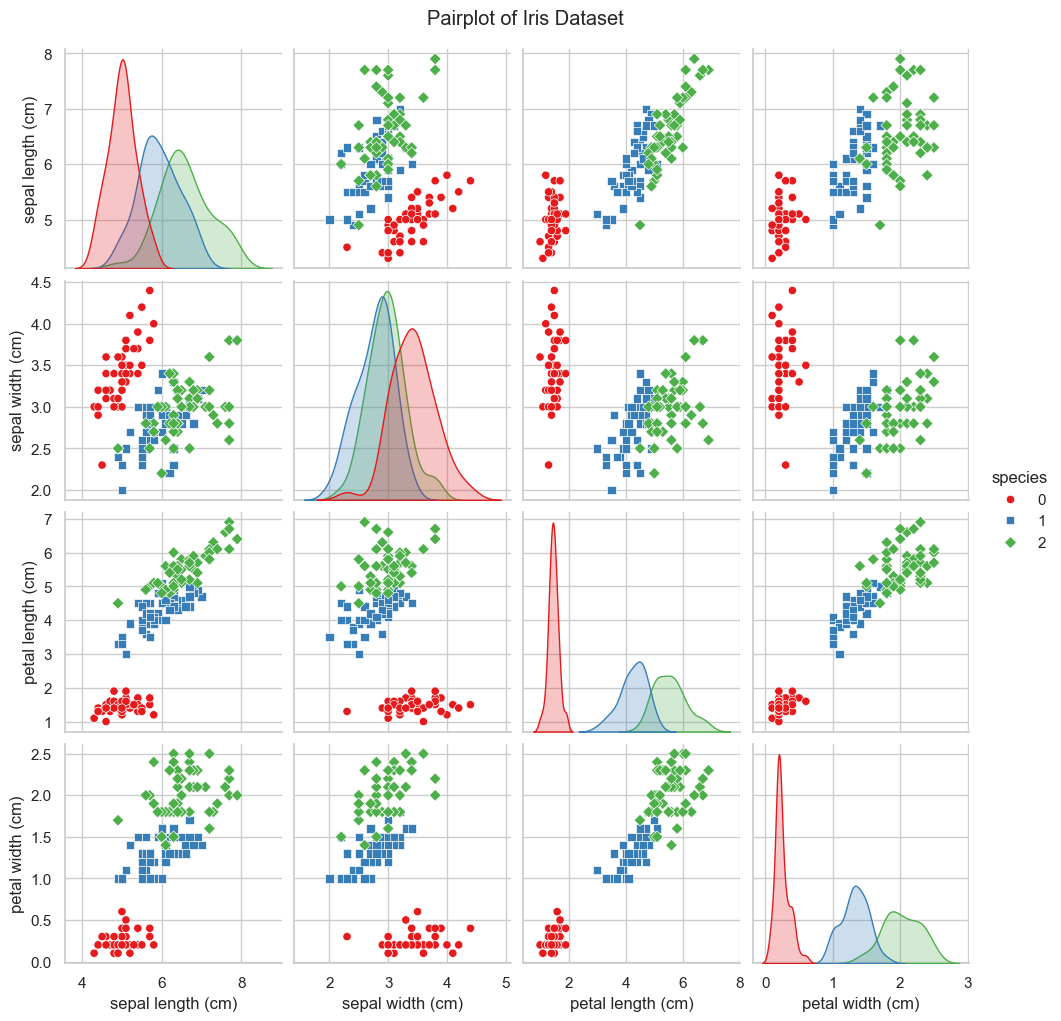

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='species', palette='Set1', markers=['o', 's', 'D'],
             diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [15]:
feature1_idx, feature2_idx = 2, 3 

In [16]:
x_min, x_max = X[:, feature1_idx].min() - 1, X[:, feature1_idx].max() + 1
y_min, y_max = X[:, feature2_idx].min() - 1, X[:, feature2_idx].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [24]:
# Predict for each point in the mesh grid
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)


SVC(kernel='linear')

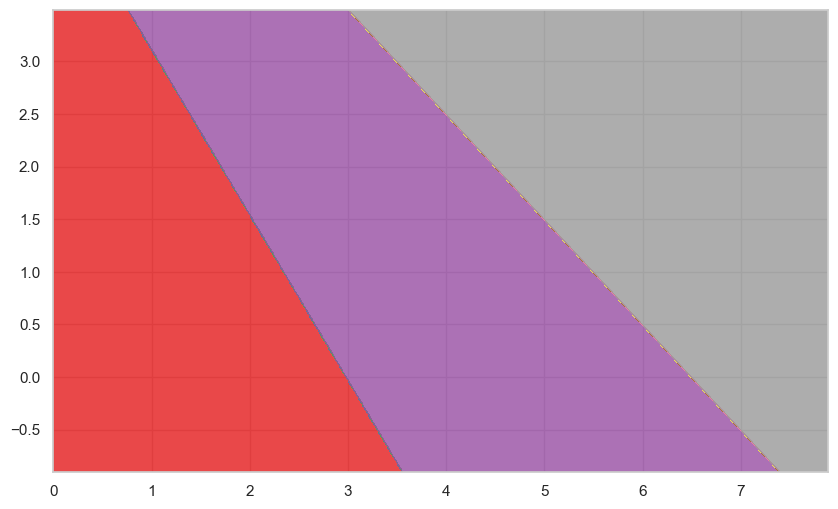

In [25]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)

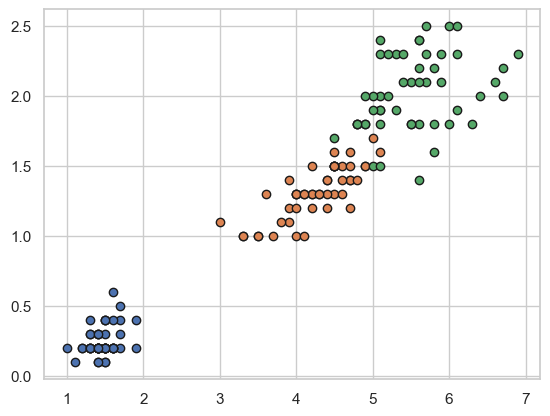

In [26]:
for i, species in enumerate(iris.target_names):
    plt.scatter(X[y == i, feature1_idx], X[y == i, feature2_idx], label=species, edgecolor='k')

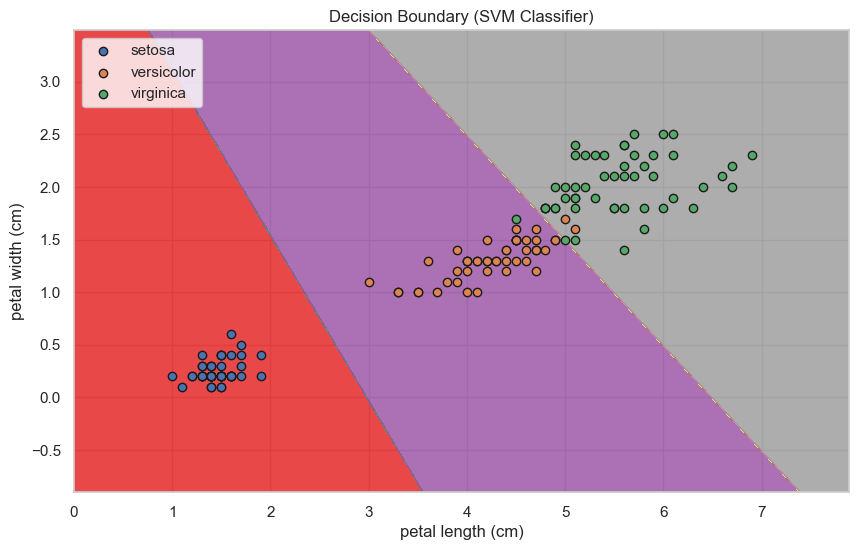

In [29]:
# Visualize decision boundaries (for two selected features: petal length and petal width)
feature1_idx, feature2_idx = 2, 3  # Indices for petal length and petal width

# Create a mesh grid
x_min, x_max = X[:, feature1_idx].min() - 1, X[:, feature1_idx].max() + 1
y_min, y_max = X[:, feature2_idx].min() - 1, X[:, feature2_idx].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for each point in the mesh grid
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)

# Plot the training points with labels
for i, species in enumerate(iris.target_names):
    plt.scatter(
        X[y == i, feature1_idx], X[y == i, feature2_idx],
        label=species, edgecolor='k'
    )

# Add labels, title, and legend
plt.xlabel(iris.feature_names[feature1_idx])
plt.ylabel(iris.feature_names[feature2_idx])
plt.title("Decision Boundary (SVM Classifier)")
plt.legend(loc='upper left')
plt.show()
